In [1]:
import sys
sys.path.insert(1, '/ai/gno/CODE/DiffSR/')

import yaml
import torch
import matplotlib.pyplot as plt
import os.path as osp

from trainers import *
from datasets import NavierStokes2DDataset
from forecastors import BaseForecaster

from matplotlib.patches import Ellipse
import numpy as np

from tqdm import tqdm

In [2]:
fno_dir = '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/FNO2d_15_43_33'
fno = BaseForecaster(fno_dir)

unet_dir = '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/UNet2d_15_40_53'
unet = BaseForecaster(unet_dir)

Building model: FNO2d
=> loading checkpoint '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/FNO2d_15_43_33/best_model.pth'
Building model: UNet2d
=> loading checkpoint '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/UNet2d_15_40_53/best_model.pth'


In [3]:
data_args = unet.data_args
dataset = NavierStokes2DDataset(data_args)
loader = torch.utils.data.DataLoader(dataset.test_dataset, batch_size=1, shuffle=False, num_workers=0)
normalizer = dataset.normalizer

Loading processed data from  /ai/gno/DATA/ns/ns_V1e-5_N1200_T20_sr.pt


In [4]:
fno_metrics = fno.forecast(loader, normalizer)
unet_metrics = unet.forecast(loader, normalizer)

mse: 0.00199356 | rmse: 0.04464936 | psnr: 43.34700012 | ssim: 0.98808980 | Time: 1.73s
mse: 0.00230920 | rmse: 0.04805415 | psnr: 42.70868301 | ssim: 0.98915601 | Time: 2.47s


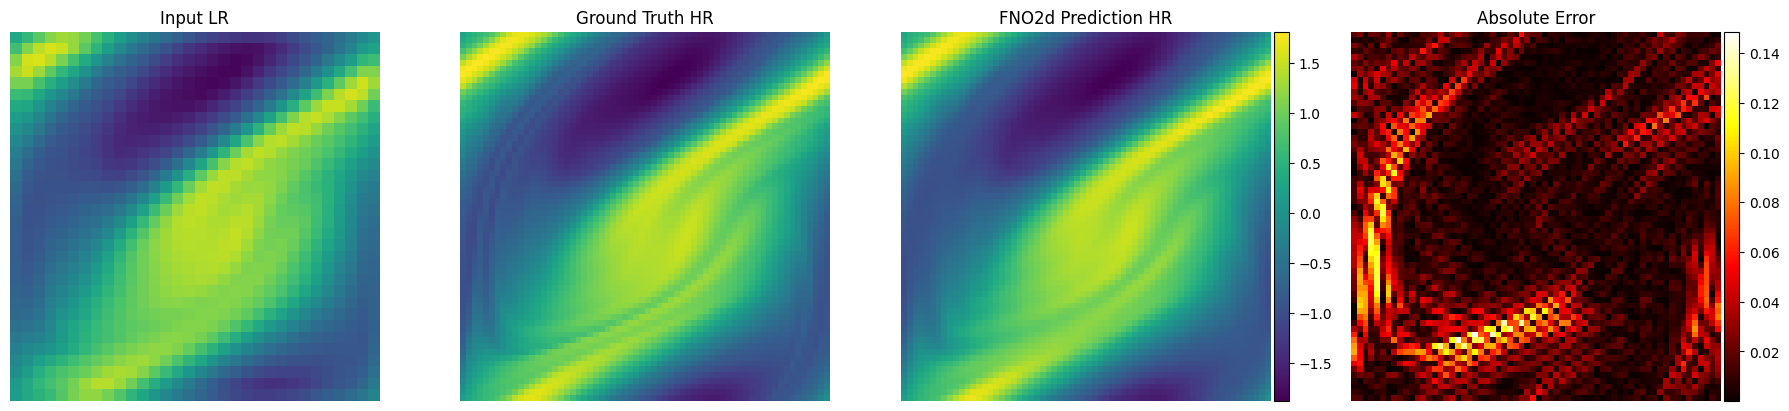

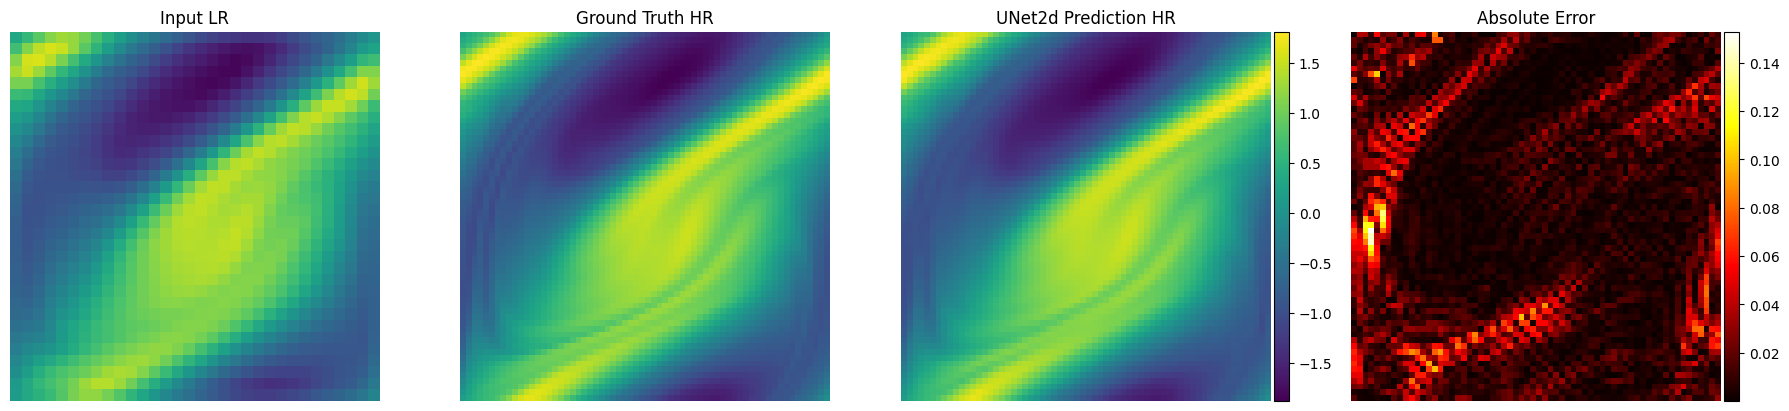

In [6]:
idx = 10
raw_x = loader.dataset[idx][0].unsqueeze(0)
raw_y = loader.dataset[idx][1].unsqueeze(0)

fno.vis(raw_x, raw_y, normalizer)
unet.vis(raw_x, raw_y, normalizer)